<a href="https://colab.research.google.com/github/sakthipriyas/DataScience/blob/main/eCommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix , roc_curve

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

**First overview of data**
  * `customer ID` - Unique customer ID (numerical)
  * `Churn` - Churn Flag (numerical)
  * `Tenure` - Tenure of customer in organization (numerical)
  * `PreferredLoginDevice` - Preferred login device of customer (categorical)
  * `CityTier` - City tier (numerical)
  * `WarehouseToHome` - Distance in between warehouse to home of customer (numerical)
  * `PreferredPaymentMode` - Preferred payment method of customer (categorical)
  * `Gender` - Gender of customer (categorical)
  * `HourSpendOnApp` - Number of hours spend on mobile application or website (numerical)
  * `NumberOfDeviceRegistered` - Total number of deceives is registered on particular customer (numerical)
  * `PreferedOrderCat ` - Preferred order category of customer in last month (categorical)
  * `SatisfactionScore` - Satisfactory score of customer on service (numerical)
  * `MaritalStatus` - Marital status of customer (categorical)
  * `NumberOfAddress` - Total number of address added on particular customer (numerical)
  * `Complain` - Any complaint has been raised in last month (numerical)
  * `OrderAmountHikeFromlastYear` - Percentage increases in order from last year (numerical)
  * `CouponUsed` - Total number of coupon has been used in last month (numerical)
  * `OrderCount` - Total number of orders has been places in last month (numerical)
  * `DaySinceLastOrder` - Day Since last order by customer (numerical)
  * `CashbackAmount` - Average cashback in last month (numerical)
  
**-----------------------------------------------------------------------**

In [23]:
file_path = '/content/E Commerce Dataset.xlsx'

In [24]:
df = pd.read_excel(file_path, sheet_name='E Comm')

In [25]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [26]:
df.shape

(5630, 20)

In [27]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [28]:
first_rows = df.head()

# Print the first rows
#print(first_rows)

# Print the value and type of each column in the first rows
for column in first_rows.columns:
    column_values = first_rows[column]
    value = column_values.values[0]
    value_type = type(value).__name__
    print(f"Column: {column} -- Value: {value} -- Type: {value_type}\n")

Column: CustomerID -- Value: 50001 -- Type: int64

Column: Churn -- Value: 1 -- Type: int64

Column: Tenure -- Value: 4.0 -- Type: float64

Column: PreferredLoginDevice -- Value: Mobile Phone -- Type: str

Column: CityTier -- Value: 3 -- Type: int64

Column: WarehouseToHome -- Value: 6.0 -- Type: float64

Column: PreferredPaymentMode -- Value: Debit Card -- Type: str

Column: Gender -- Value: Female -- Type: str

Column: HourSpendOnApp -- Value: 3.0 -- Type: float64

Column: NumberOfDeviceRegistered -- Value: 3 -- Type: int64

Column: PreferedOrderCat -- Value: Laptop & Accessory -- Type: str

Column: SatisfactionScore -- Value: 2 -- Type: int64

Column: MaritalStatus -- Value: Single -- Type: str

Column: NumberOfAddress -- Value: 9 -- Type: int64

Column: Complain -- Value: 1 -- Type: int64

Column: OrderAmountHikeFromlastYear -- Value: 11.0 -- Type: float64

Column: CouponUsed -- Value: 1.0 -- Type: float64

Column: OrderCount -- Value: 1.0 -- Type: float64

Column: DaySinceLastOrde

In [29]:
df.duplicated().sum()

0

In [30]:
(df.isna().sum()/5630) *100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [33]:
df.shape

(3774, 20)

In [34]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,53017.994966,0.167197,8.776895,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.213590
std,1608.979289,0.373201,7.678508,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.093966
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.485000
50%,53160.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.050000
75%,54394.500000,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.010000
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,324.990000


In [35]:
churn_ratio = pd.crosstab(index=df['Churn'], columns='count', normalize=True)*100
churn_ratio

col_0,count
Churn,
0,83.280339
1,16.719661


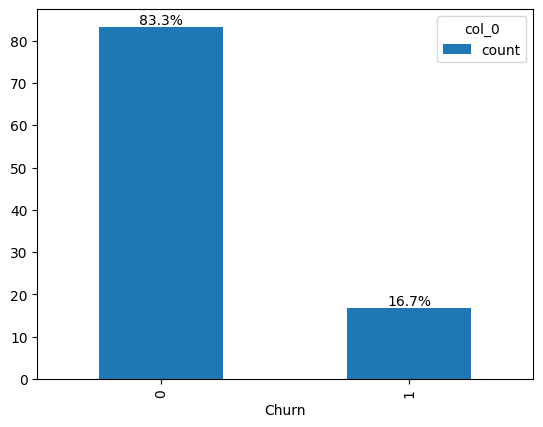

In [36]:
ax = churn_ratio.plot(kind='bar', stacked=True);
percentages = churn_ratio['count']
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentages[i]), ha='center', va='bottom');


Drop fields that are not important for analysis. Customer ID.

In [37]:
df1 = df.iloc[:, 1:]

In [38]:
df1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41


In [39]:
df1.reset_index(inplace=True, drop=True)
df1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
2,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
3,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
4,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41


<ipython-input-40-cbced5230859>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, ax=ax);


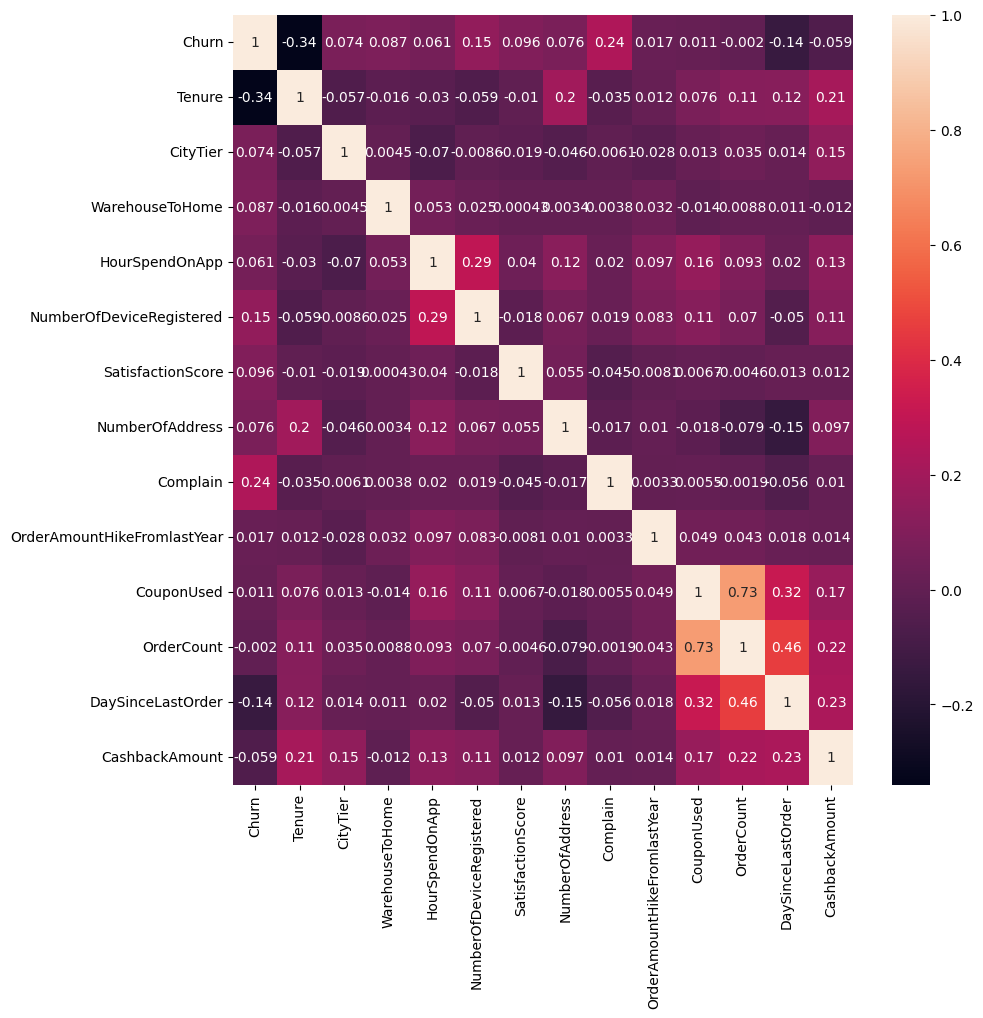

In [40]:
fig, ax = plt.subplots(figsize=[10,10])
sns.heatmap(df1.corr(), annot=True, ax=ax);

In [41]:
df1.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [42]:
df_dummies = df1.copy()

<ipython-input-43-782265b24a47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');


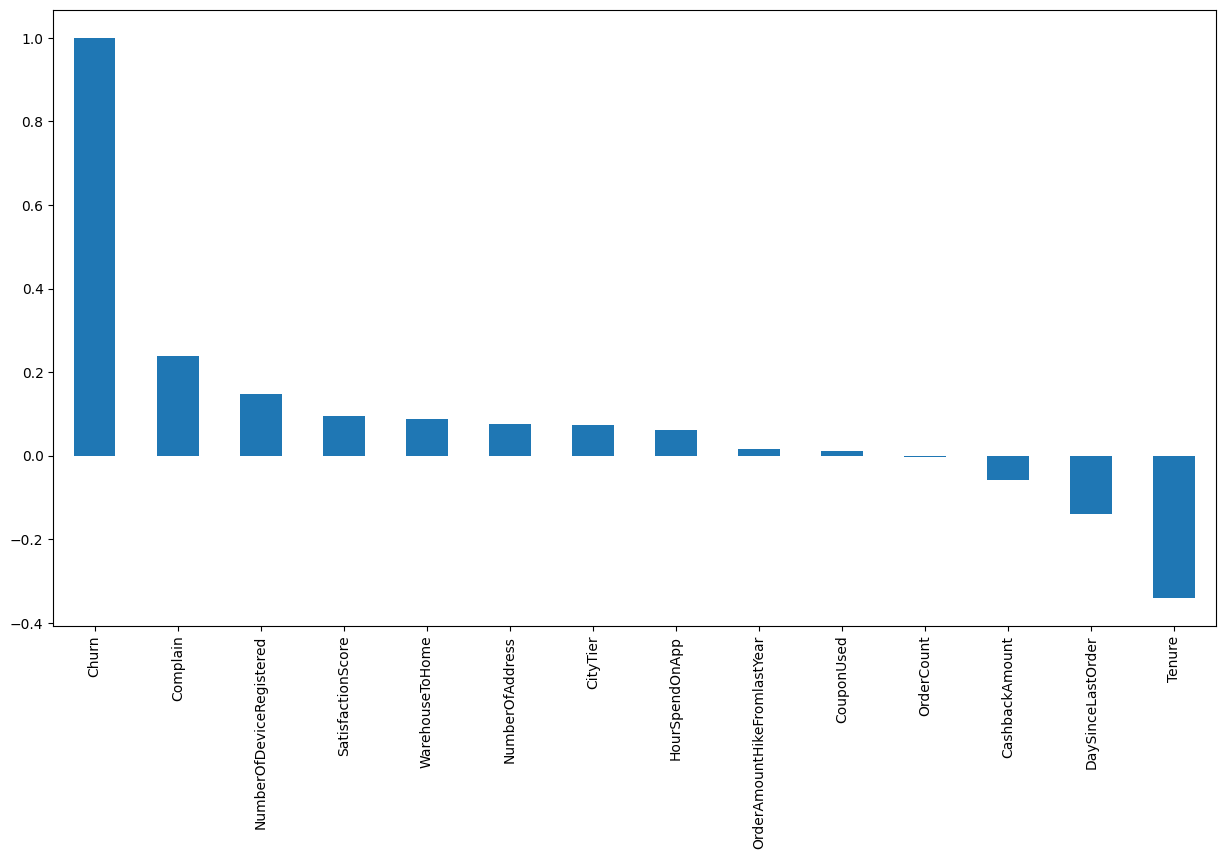

In [43]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

In [44]:
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [45]:
label_encoder = preprocessing.LabelEncoder()
for col in cat_cols:
  df_dummies[col] = label_encoder.fit_transform(df1[col])


In [46]:
df_dummies.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
2,1,0.0,0,1,22.0,4,0,3.0,5,4,5,2,2,1,22.0,4.0,6.0,7.0,139.19
3,1,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,153.81
4,1,0.0,2,1,11.0,1,1,2.0,3,3,3,2,2,1,13.0,2.0,2.0,2.0,134.41


In [47]:
df_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3774.0,0.167197,0.373201,0.0,0.000,0.00,0.00,1.00
Tenure,3774.0,8.776895,7.678508,0.0,1.000,8.00,13.00,51.00
PreferredLoginDevice,3774.0,0.898251,0.690500,0.0,0.000,1.00,1.00,2.00
CityTier,3774.0,1.707737,0.936725,1.0,1.000,1.00,3.00,3.00
WarehouseToHome,3774.0,15.743773,8.594330,5.0,9.000,14.00,21.00,127.00
PreferredPaymentMode,3774.0,3.668786,1.234926,0.0,3.000,4.00,4.00,6.00
Gender,3774.0,0.601749,0.489603,0.0,0.000,1.00,1.00,1.00
HourSpendOnApp,3774.0,2.981187,0.722158,0.0,2.000,3.00,3.00,5.00
NumberOfDeviceRegistered,3774.0,3.754107,1.025233,1.0,3.000,4.00,4.00,6.00
PreferedOrderCat,3774.0,2.459724,1.278725,0.0,2.000,2.00,4.00,5.00


In [48]:
df1.groupby('Gender')['Complain'].sum()
#['Complain'].value_counts().plot(kind='bar')

Gender
Female    457
Male      608
Name: Complain, dtype: int64

In [49]:
gender = df1['Gender'].value_counts()
gender

Male      2271
Female    1503
Name: Gender, dtype: int64

In [50]:
df1.groupby('Gender')['Complain'].sum()/gender *100

Female    30.405855
Male      26.772347
dtype: float64

Data Modelling

In [51]:
X = df_dummies.iloc[:, 1:]
y = df_dummies['Churn']

In [52]:
X.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
2,0.0,0,1,22.0,4,0,3.0,5,4,5,2,2,1,22.0,4.0,6.0,7.0,139.19
3,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,153.81
4,0.0,2,1,11.0,1,1,2.0,3,3,3,2,2,1,13.0,2.0,2.0,2.0,134.41


In [53]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [54]:

accuracy = []
precision = []
recall= []
f1 = []

In [55]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(class_weight='balanced')
# training the model
log = model_log.fit(X_train, y_train)
# predicting data using trained model.
log_prediction = model_log.predict(X_test)

log_accuracy = metrics.accuracy_score(y_test, log_prediction)
log_precision = precision_score(y_test, log_prediction)
log_recall = recall_score(y_test, log_prediction)
log_f1 = f1_score(y_test, log_prediction)

print('Accuracy: ', log_accuracy)
print('Precision: ', log_precision) # TP/(TP+FP)
print('Recall: ', log_recall) # TP/(TP+FN)
print('F1: ', log_f1) # 2*precision*recall/(precision+recall)

Accuracy:  0.8014121800529568
Precision:  0.42028985507246375
Recall:  0.8529411764705882
F1:  0.5631067961165048


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


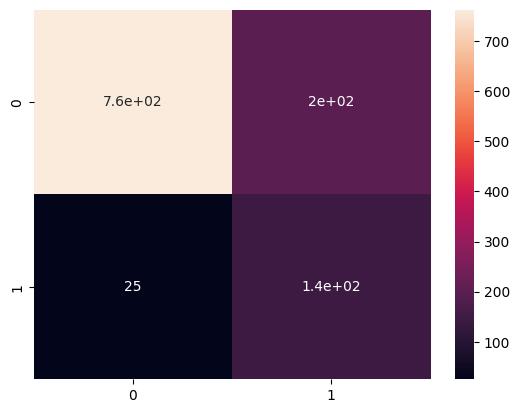

Accuracy:  0.8
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       963
           1       0.42      0.85      0.56       170

    accuracy                           0.80      1133
   macro avg       0.69      0.82      0.72      1133
weighted avg       0.89      0.80      0.83      1133



,Predicted: 0,Predicted: 1
Actual: 0,763,200
Actual: 1,25,145


In [56]:
# Check the confusion matrix of the model
con_m = confusion_matrix(y_test, log_prediction)
sns.heatmap(con_m, annot=True)
plt.show()
# Check the accuracy of the model
print('Accuracy: ', round(model_log.score(X_test, y_test), 2))
# Check the classification report of the model
print(classification_report(y_test, log_prediction))
# Create a DataFrame to display the confusion matrix with predicted and actual axis labels
con_m_df = pd.DataFrame(con_m, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
display(con_m_df)

In [57]:
y_probability = model_log.predict_proba(X_test)

In [58]:
y_probability = y_probability[:,1]

In [59]:
fpr, tpr, threshold = roc_curve(y_test, y_probability)

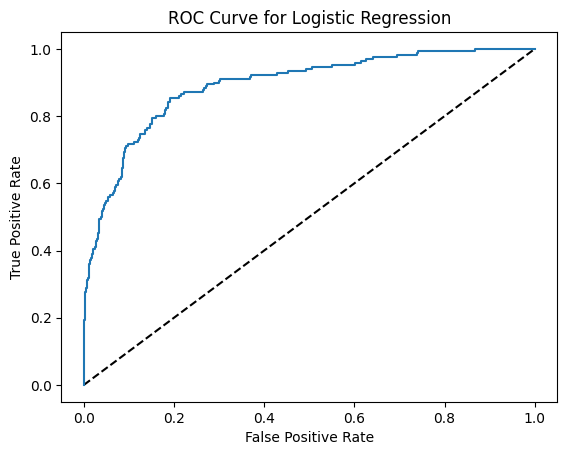

In [60]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=1000, random_state=42, max_features='auto', max_leaf_nodes=30)
model_rfc.fit(X_train, y_train)
rfc_prediction = model_rfc.predict(X_test)

rfc_accuracy = metrics.accuracy_score(y_test, rfc_prediction)
rfc_precision = precision_score(y_test, rfc_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)


print('Accuracy: ', rfc_accuracy)
print('Precision: ', rfc_precision) # TP/(TP+FP)
print('Recall: ', rfc_recall) # TP/(TP+FN)
print('F1: ', rfc_f1) # 2*precision*recall/(precision+recall)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy:  0.910856134157105
Precision:  0.8709677419354839
Recall:  0.4764705882352941
F1:  0.6159695817490495


In [62]:
y_probability = model_rfc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_probability)

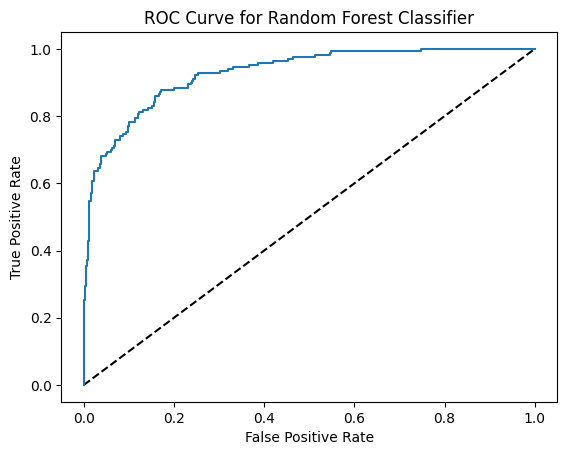

In [63]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.show()